In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_O= pd.read_csv('Breast_cancer_data.csv')     #load the .csv file into the df_O variable
df_O.columns                                    #checking the columns of the dataset
#df_O.head



Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

Number of Benign:  357
Number of Malignant :  212


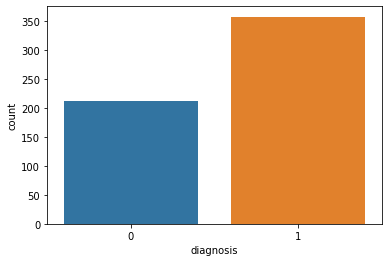

In [13]:
#countplot for getting the number of entries in each case.
sns.countplot(df_O.diagnosis,label="COUNT")     
B,M=df_O.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

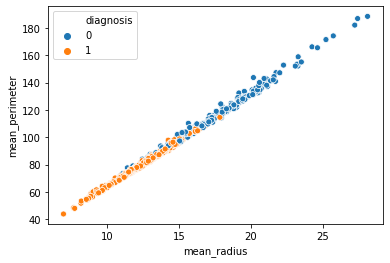

In [14]:
#scatterplot for radius against perimeter
sns.scatterplot(x="mean_radius", y="mean_perimeter", hue="diagnosis", data=df_O)    

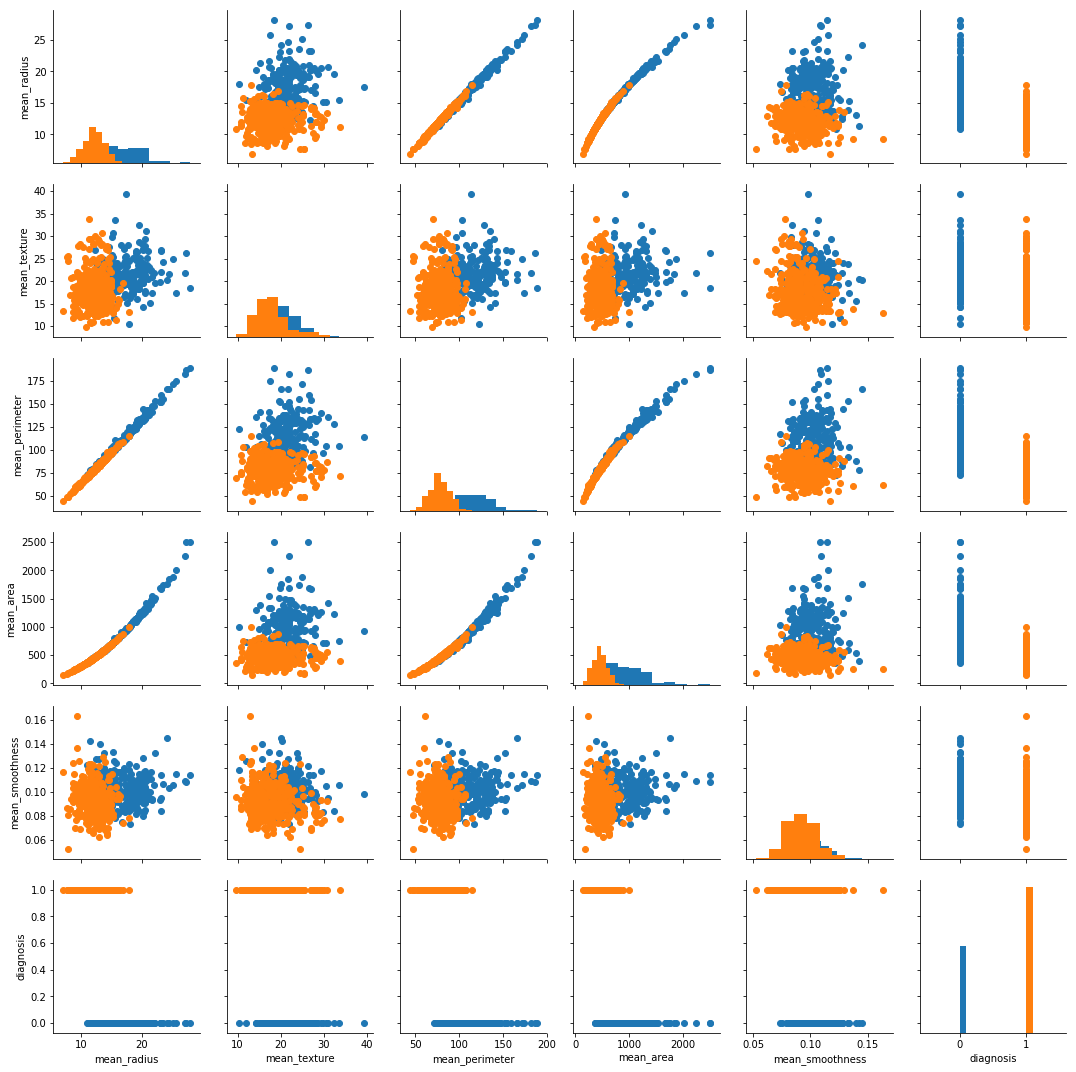

In [0]:
#PairGrid for the dataset with diagnoal columns as histograms 
P=sns.PairGrid(df_O, hue='diagnosis')
P = P.map_diag(plt.hist)
P = P.map_offdiag(plt.scatter)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

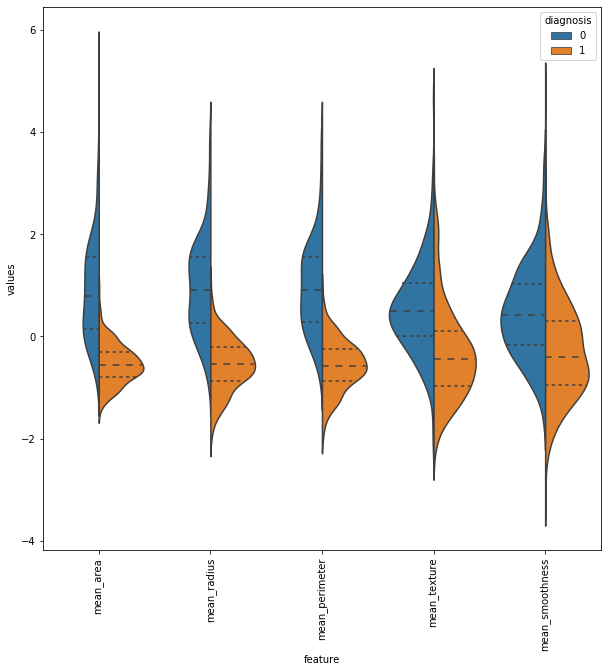

In [15]:
#Standardization of data for plotting Violin, Box and Swarm Plots
df_1=df_O
df_1["mean_area"] = (df_1["mean_area"] - df_1["mean_area"].mean())/(df_1["mean_area"].std())
df_1["mean_radius"] = (df_1["mean_radius"] - df_1["mean_radius"].mean())/(df_1["mean_radius"].std())
df_1["mean_perimeter"] = (df_1["mean_perimeter"] - df_1["mean_perimeter"].mean())/(df_1["mean_perimeter"].std())
df_1["mean_texture"] = (df_1["mean_texture"] - df_1["mean_texture"].mean())/(df_1["mean_texture"].std())
df_1["mean_smoothness"] = (df_1["mean_smoothness"] - df_1["mean_smoothness"].mean())/(df_1["mean_smoothness"].std())

#Violin Plot for all the features
plt.figure(figsize=(10,10))
df_1 = pd.melt(df_1, id_vars = "diagnosis", value_vars =[("mean_area") ,("mean_radius"),("mean_perimeter"),"mean_texture",'mean_smoothness'],
             var_name ="feature", value_name="values")
sns.violinplot(x="feature", y="values", hue="diagnosis", data=df_1,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

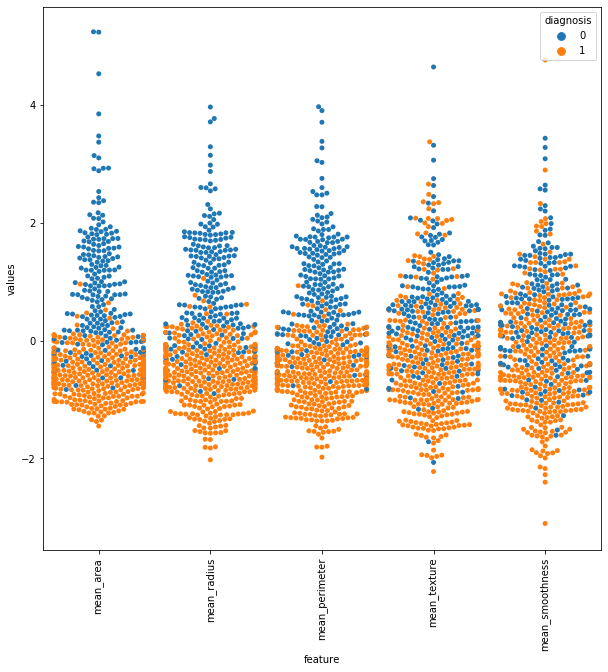

In [17]:
#SwarmPlots for all the features
plt.figure(figsize=(10,10))
sns.swarmplot(x="feature", y="values",hue="diagnosis", data=df_1)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

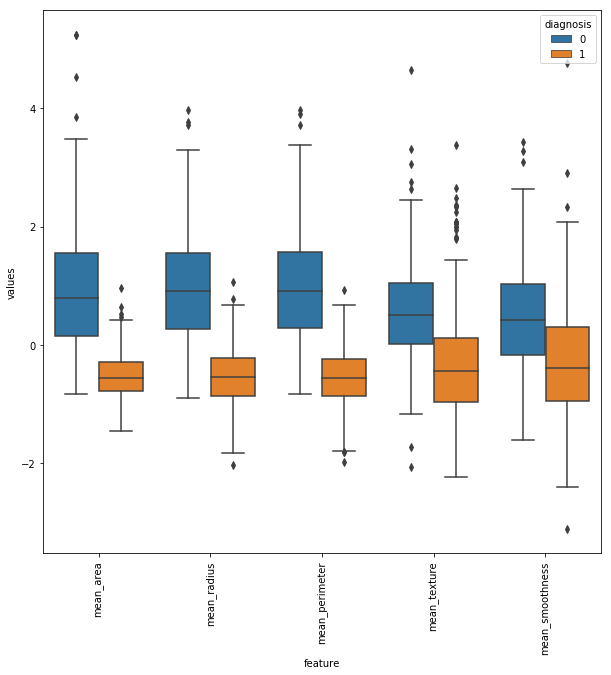

In [0]:
#BoxPlots for all the features
plt.figure(figsize=(10,10))
sns.boxplot(x="feature", y="values", hue="diagnosis", data=df_1)
plt.xticks(rotation=90)

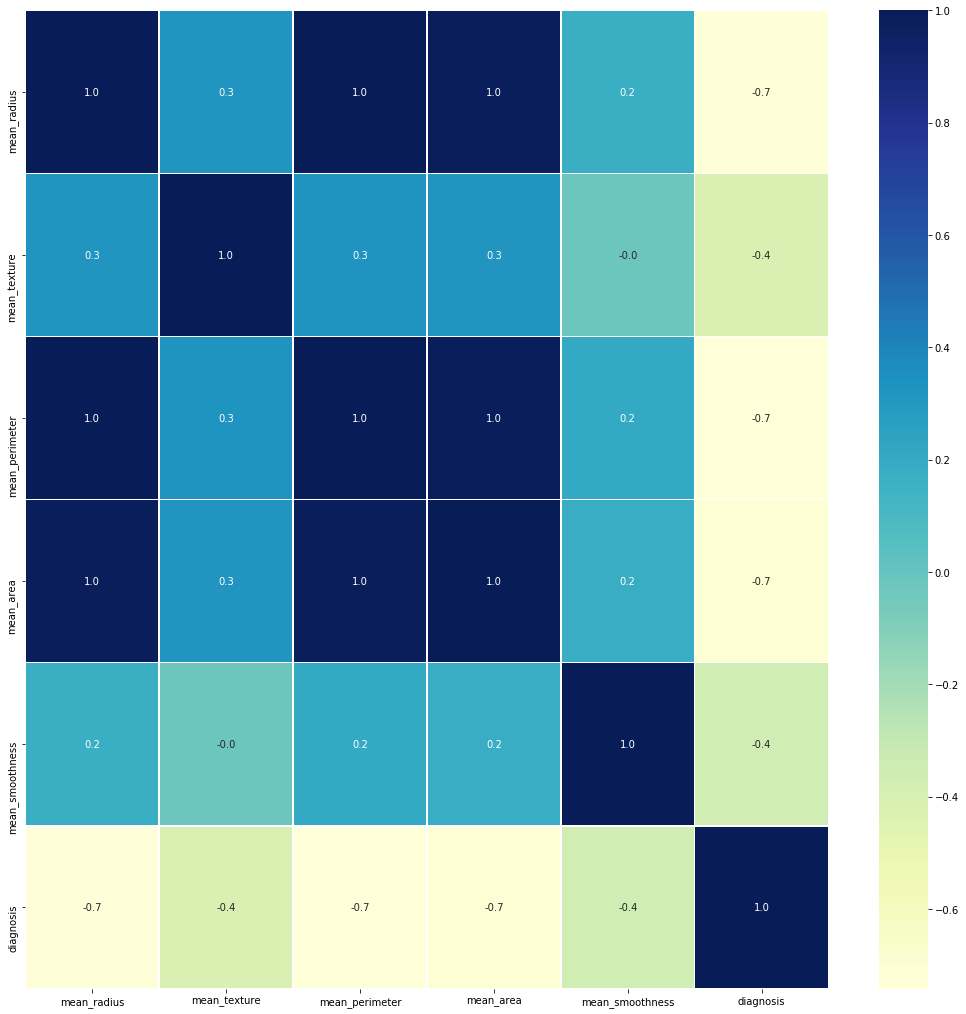

In [18]:
#HeatMap for the all features showing co-relation between each features
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_O.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="YlGnBu")

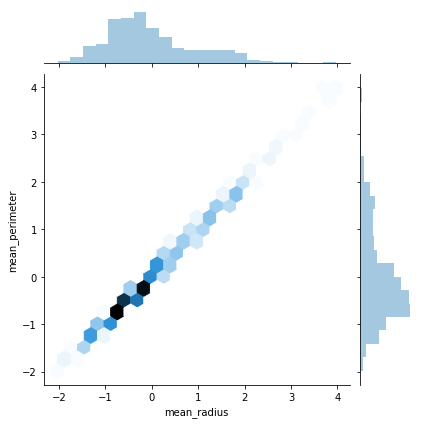

In [0]:
sns.jointplot("mean_radius","mean_perimeter",data=df_O, kind="hex")

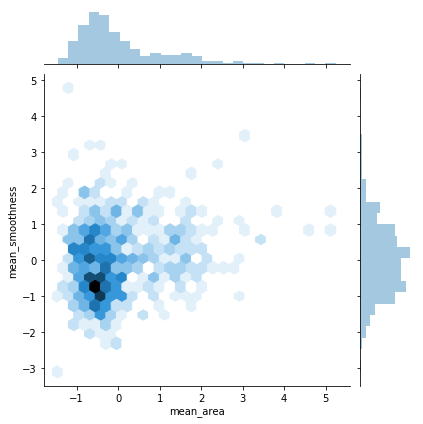

In [0]:
#hexbinplot for Area and Smoothness
sns.jointplot("mean_area","mean_smoothness",data=df_O, kind="hex")

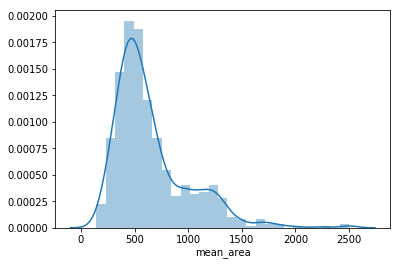

In [0]:
x=df_O.mean_area
sns.distplot(x)

In [0]:
print(min(df_O.mean_radius))
print(max(df_O.mean_radius))


6.981
28.11


In [0]:
print(min(df_O.mean_area))
print(max(df_O.mean_area))


143.5
2501.0


In [0]:
print(min(df_O.mean_perimeter))
print(max(df_O.mean_perimeter))


43.79
188.5


In [0]:
print(min(df_O.mean_texture))
print(max(df_O.mean_texture))


9.71
39.28


In [0]:
print(min(df_O.mean_smoothness))
print(max(df_O.mean_smoothness))


0.052629999999999996
0.1634


In [27]:
df_2=df_O
df_2=df_2.drop(columns='diagnosis')
print(df_2)
df_2["mean_area"] = (df_2["mean_area"] - df_2["mean_area"].mean())/(df_2["mean_area"].std())
df_2["mean_radius"] = (df_2["mean_radius"] - df_2["mean_radius"].mean())/(df_2["mean_radius"].std())
df_2["mean_perimeter"] = (df_2["mean_perimeter"] - df_2["mean_perimeter"].mean())/(df_2["mean_perimeter"].std())
df_2["mean_texture"] = (df_2["mean_texture"] - df_2["mean_texture"].mean())/(df_2["mean_texture"].std())
df_2["mean_smoothness"] = (df_2["mean_smoothness"] - df_2["mean_smoothness"].mean())/(df_2["mean_smoothness"].std())

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0       1.096100     -2.071512        1.268817   0.983510         1.567087
1       1.828212     -0.353322        1.684473   1.907030        -0.826235
2       1.578499      0.455786        1.565126   1.557513         0.941382
3      -0.768233      0.253509       -0.592166  -0.763792         3.280667
4       1.748758     -1.150804        1.775011   1.824624         0.280125
..           ...           ...             ...        ...              ...
564     2.109139      0.720838        2.058974   2.341795         1.040926
565     1.703356      2.083301        1.614511   1.722326         0.102368
566     0.701667      2.043775        0.672084   0.577445        -0.839745
567     1.836725      2.334403        1.980781   1.733693         1.524426
568    -1.806811      1.220718       -1.812793  -1.346604        -3.109349

[569 rows x 5 columns]


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_2,df_O.diagnosis,test_size = 0.6,random_state=42)
print(x_train.shape)

(227, 5)


In [45]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()
modelLR.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_predict = modelLR.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm= confusion_matrix(y_test, y_predict)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[114   9]
 [ 11 208]]


In [47]:
from sklearn import metrics
print("Accuracy of Logistic Model:",
      metrics.accuracy_score(y_test, y_predict))

Accuracy of Logistic Model: 0.9415204678362573


In [50]:
df_2=df_2.drop(columns=['mean_perimeter','mean_area'])
print(df_2)

     mean_radius  mean_texture  mean_smoothness
0       1.096100     -2.071512         1.567087
1       1.828212     -0.353322        -0.826235
2       1.578499      0.455786         0.941382
3      -0.768233      0.253509         3.280667
4       1.748758     -1.150804         0.280125
..           ...           ...              ...
564     2.109139      0.720838         1.040926
565     1.703356      2.083301         0.102368
566     0.701667      2.043775        -0.839745
567     1.836725      2.334403         1.524426
568    -1.806811      1.220718        -3.109349

[569 rows x 3 columns]


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_2,df_O.diagnosis,test_size = 0.6,random_state=42)

In [51]:
modelLR.fit(x_train,y_train)
y_predict = modelLR.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm= confusion_matrix(y_test, y_predict)
print("Confusion Matrix after feature reduction")
print(cm)


Confusion Matrix after feature reduction
[[114   9]
 [ 11 208]]


In [52]:
from sklearn import metrics
print("Accuracy of Logistic Model after feature reduction:",
      metrics.accuracy_score(y_test, y_predict))

Accuracy of Logistic Model after feature reduction: 0.9415204678362573
